In [ ]:
! pip install pandas matplotlib seaborn

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Amazon Sales Data.csv')
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [5]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [10]:
df['Year-Month'] = df['Order Date'].dt.to_period('M')

In [ ]:
monthly_sales = df.groupby(['Year', 'Month']).agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()
monthly_sales

In [ ]:
yearly_sales = df.groupby('Year').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()
yearly_sales

In [17]:
monthly_sales.to_csv('monthly_sales.csv', index=False)
yearly_sales.to_csv('yearly_sales.csv', index=False)

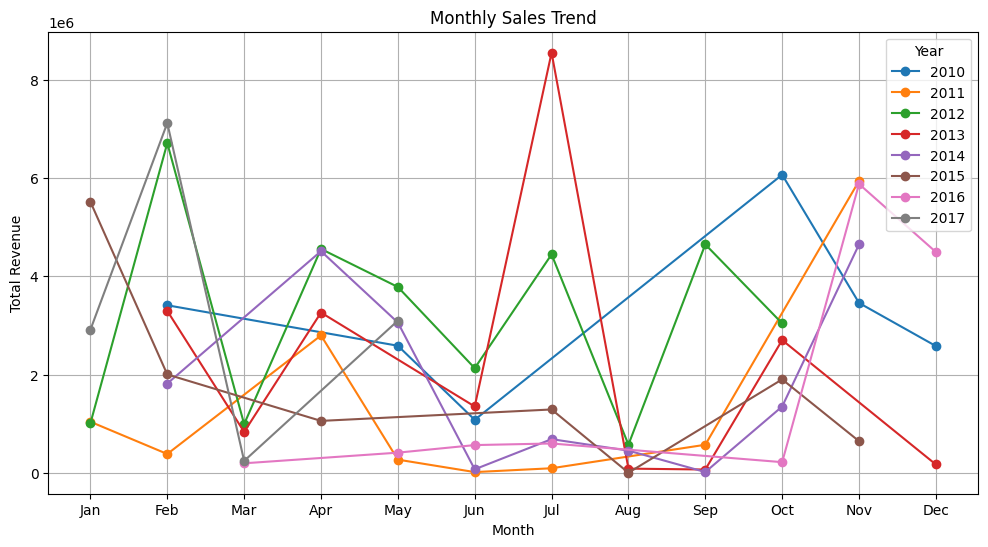

In [27]:
plt.figure(figsize=(12, 6))
for year in monthly_sales['Year'].unique():
 plt.plot(monthly_sales[monthly_sales['Year'] == year]['Month'], 
monthly_sales[monthly_sales['Year'] == year]['Total Revenue'], 
marker='o', label=year)
 plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid()
plt.show()


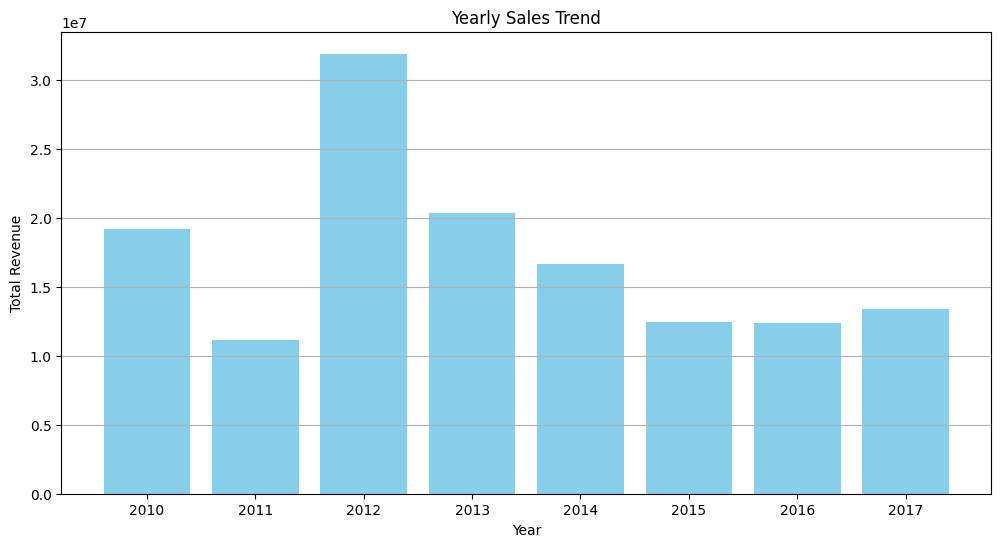

In [28]:
# Yearly Sales Trend
plt.figure(figsize=(12, 6))
plt.bar(yearly_sales['Year'], yearly_sales['Total Revenue'], color='skyblue')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(yearly_sales['Year'])
plt.grid(axis='y')
plt.show()